### Annamolly Dection
- Train an autoencoder to detect anomalies on the `ECG5000 dataset`This dataset contains 5,000 `Electrocardiograms`, each with 140 data points. We will use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm). We are interested in identifying the abnormal rhythms.


- An autoencoder is trained to minimize reconstruction error. We will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. Our hypothesis is that the abnormal rhythms will have higher reconstruction error. We will then classify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import losses
from keras.layers import Dense, Input
from keras.datasets import fashion_mnist
from keras.models import Model

In [41]:
df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
pd.options.display.max_columns=150
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,-0.493223,-0.463052,-0.301644,-0.232734,-0.125055,-0.153943,-0.024357,-0.065609,0.034999,0.061935,0.071195,0.123925,0.103124,0.225228,0.128683,0.302483,0.257276,0.196352,0.179383,0.244729,0.341217,0.328204,0.406042,0.446605,0.424068,0.481512,0.477844,0.624083,0.574585,0.598013,0.564592,0.607979,0.620635,0.656253,0.684748,0.694273,0.665584,0.575796,0.638135,0.614917,0.569083,0.468576,0.442818,0.468274,0.432493,0.407958,0.418623,0.362531,0.410959,0.471666,0.372167,0.337875,0.221405,0.273997,0.298664,0.263564,0.342564,0.419505,0.586607,0.860624,1.173345,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,-0.206160,-0.224480,-0.048684,-0.019621,0.094805,0.116786,0.185186,0.230526,0.138027,0.244426,0.271695,0.259003,0.269202,0.127065,0.202073,0.255983,0.153115,0.210216,0.191082,0.190927,0.210510,0.207108,0.204888,0.200865,0.346920,0.348002,0.254537,0.331975,0.356690,0.349930,0.430380,0.467502,0.486063,0.403188,0.478956,0.397392,0.464120,0.451795,0.361361,0.379831,0.342785,0.399107,0.387508,0.255703,0.284034,0.284993,0.250108,0.173036,0.149423,0.141685,0.222261,0.172847,0.150779,0.176566,0.280942,0.489939,0.660889,0.893193,1.026997,1.202394,1.557410,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,-0.438023,-0.436248,-0.400114,-0.134987,-0.239347,-0.120244,-0.001971,0.285000,0.315646,0.107364,0.109521,0.158078,0.291898,0.261294,0.188407,0.140651,0.263365,0.287207,0.314317,0.177942,0.138290,0.321069,0.458168,0.251916,0.261353,0.277488,0.298793,0.459075,0.419147,0.520509,0.537761,0.603211,0.475634,0.521693,0.735248,0.729541,0.718523,0.498433,0.545441,0.604827,0.521296,0.394381,0.405020,0.597563,0.531130,0.377651,0.467701,0.457569,0.341116,0.407913,0.459127,0.403937,0.298191,0.461101,0.664659

In [6]:
df.shape

(4998, 141)

In [7]:
df.size

704718

In [8]:
for col in df.columns:
    if df[col].isna().sum()!=0:
        print(col, df[col].isna().sum())
else:
    print("No missing values")

No missing values


### Split data into input and output

In [42]:
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
print(data.shape)
print(labels)

(4998, 140)
[1. 1. 1. ... 0. 0. 0.]


### Split data into train and test set

In [43]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(3998, 140)
(1000, 140)
(3998,)
(1000,)


### Normalizing the Data

In [44]:
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#I have converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

### We will train the autoencoder using only the normal rhythms, which are labeled in this dataset as `1`. Separate the normal rhythms from the abnormal rhythms.

In [45]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


In [46]:
print(an_test_data)

tf.Tensor(
[[0.3687897  0.30728117 0.26587984 ... 0.58551234 0.5662988  0.5726404 ]
 [0.45878157 0.43861866 0.44218123 ... 0.29617104 0.32473418 0.43136704]
 [0.344323   0.31411245 0.32462206 ... 0.3313962  0.3809925  0.45533565]
 ...
 [0.3493378  0.28614876 0.29047537 ... 0.31901175 0.34637472 0.45208865]
 [0.5713978  0.5637761  0.5245046  ... 0.12886006 0.18022895 0.26692218]
 [0.4697181  0.4619233  0.461555   ... 0.5800685  0.5970339  0.60342324]], shape=(440, 140), dtype=float32)


### Plot random Normal ECG image

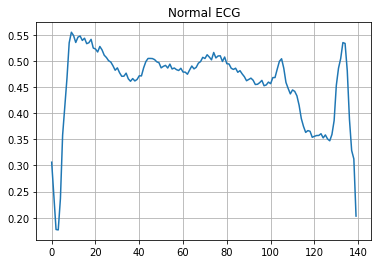

In [47]:
plt.plot(np.arange(140), n_train_data[100])
plt.grid()
plt.title('Normal ECG')
plt.show()

### Plot the Abnormal ECG image

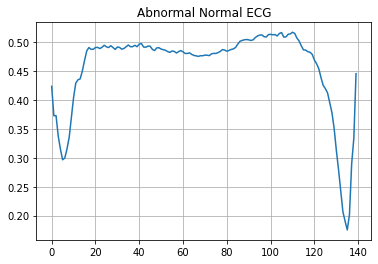

In [68]:
plt.plot(np.arange(140), an_train_data[100])
plt.grid()
plt.title('Abnormal Normal ECG')
plt.show()

### Create Autoencoder Model

In [50]:

class detector(Model):
    def __init__(self):
        super(detector, self).__init__()
        self.encoder = tf.keras.Sequential([
                                        Dense(32, activation='relu'),
                                        Dense(16, activation='relu'),
                                        Dense(8, activation='relu')
    ])
        self.decoder = tf.keras.Sequential([
                                        Dense(16, activation='relu'),
                                        Dense(32, activation='relu'),
                                        Dense(140, activation='sigmoid')
    ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### Compile the Model

In [54]:
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 100, batch_size=1000, validation_data=(n_test_data, n_test_data))

Epoch 1/100
3/3 [==============================] - 4s 189ms/step - loss: 0.0583 - val_loss: 0.0571
Epoch 2/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0567 - val_loss: 0.0556
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0552 - val_loss: 0.0540
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.0536 - val_loss: 0.0521
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 0.0516 - val_loss: 0.0500
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0496 - val_loss: 0.0479
Epoch 7/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0474 - val_loss: 0.0456
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0451 - val_loss: 0.0433
Epoch 9/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0428 - val_loss: 0.0409
Epoch 10/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0404 - val_loss: 0.0386
Epoch 11/100
3/3 [

### Plot the Normal and Abnormal Images

In [58]:
def plot(data, n):
    enc_img = autoencoder.encoder(data)
    dec_img = autoencoder.decoder(enc_img)
    plt.plot(data[n], 'b')
    plt.plot(dec_img[n], 'r')
    plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
    plt.legend(labels=['Input', 'Reconstruction', 'Error'])
    plt.show()

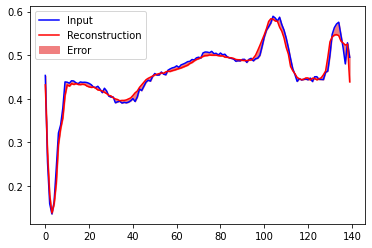

In [59]:
plot(n_test_data, 1)

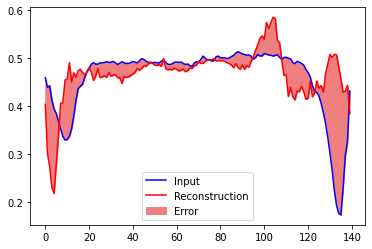

In [57]:
plot(an_test_data, 1)

### An ECG is anomalous if it is greater than a threshold. We can set the threshold in any way we want. Here We are going to set it to one standard deviation from the mean of normal training data.

In [64]:
reconstructed = autoencoder(n_train_data)
train_loss = losses.mae(reconstructed, n_train_data)
t = np.mean(train_loss) + np.std(train_loss)

def prediction(model, data, threshold):
    rec = model(data)
    loss = losses.mae(rec, data)
    return tf.math.less(loss, threshold)
print(t)

0.026420482


In [66]:
pred = prediction(autoencoder, n_test_data, t)
print(pred[:10])

tf.Tensor([False  True  True False  True  True  True False  True  True], shape=(10,), dtype=bool)
